In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_feather('/content/coffee_ratings_full.feather')

In [3]:
df2=df.copy()

In [114]:
df2.info

<bound method DataFrame.info of       total_cup_points  species                     owner country_of_origin  \
0                90.58  Arabica                 metad plc          Ethiopia   
1                89.92  Arabica                 metad plc          Ethiopia   
2                89.75  Arabica  grounds for health admin         Guatemala   
3                89.00  Arabica       yidnekachew dabessa          Ethiopia   
4                88.83  Arabica                 metad plc          Ethiopia   
...                ...      ...                       ...               ...   
1333             78.75  Robusta               luis robles           Ecuador   
1334             78.08  Robusta               luis robles           Ecuador   
1335             77.17  Robusta               james moore     United States   
1336             75.08  Robusta             cafe politico             India   
1337             73.75  Robusta             cafe politico           Vietnam   

                   

In [22]:
#sampling tecniques
# Simple random Sampling
simple_sample=df2["total_cup_points"].sample(100)
populatiion_mean=df2["total_cup_points"].mean()
simple_sample_men=np.mean(simple_sample)
print("population mean:",populatiion_mean,"simple_sample_mean:",simple_sample_men)
print("WE CAN SEE THIER IS VERY CLOSE MEAN")

population mean: 82.15120328849028 simple_sample_mean: 82.2992
WE CAN SEE THIER IS VERY CLOSE MEAN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'sample histogram')

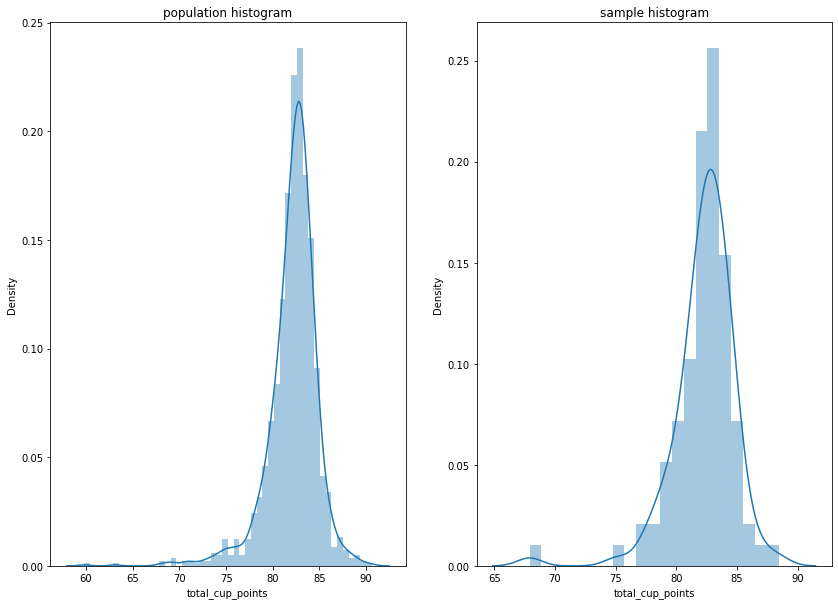

In [23]:
#population histogram
fig,ax=plt.subplots(1,2,figsize=(14,10))
sns.distplot(df["total_cup_points"],ax=ax[0]).set_title("population histogram")
#sample histogram
sns.distplot(simple_sample,ax=ax[1]).set_title("sample histogram")


# Increasing the size of sample increase the sample mean close to the population mean  and the distibution is similar when the sample size is increased



population mean: 82.15120328849028 simple_sample_mean: 82.14144
WE CAN SEE THIER IS VERY CLOSE MEAN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'sample histogram')

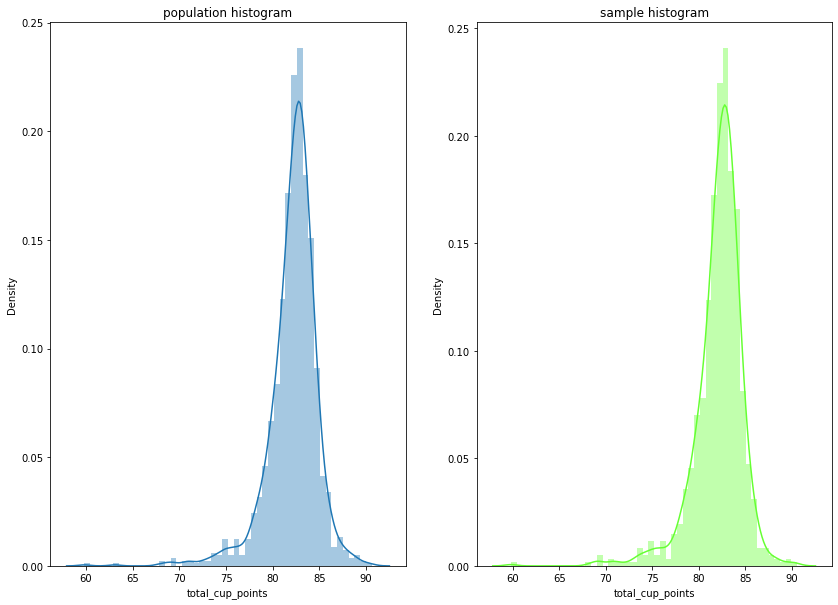

In [25]:
#sampling tecniques
# Simple random Sampling
simple_sample=df2["total_cup_points"].sample(1000)# size increased 100 to 1000
populatiion_mean=df2["total_cup_points"].mean()
simple_sample_men=np.mean(simple_sample)
print("population mean:",populatiion_mean,"simple_sample_mean:",simple_sample_men)
print("WE CAN SEE THIER IS VERY CLOSE MEAN")

#population histogram
fig,ax=plt.subplots(1,2,figsize=(14,10))
sns.distplot(df["total_cup_points"],ax=ax[0]).set_title("population histogram")
#sample histogram
sns.distplot(simple_sample,ax=ax[1],color='#66ff33').set_title("sample histogram")



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


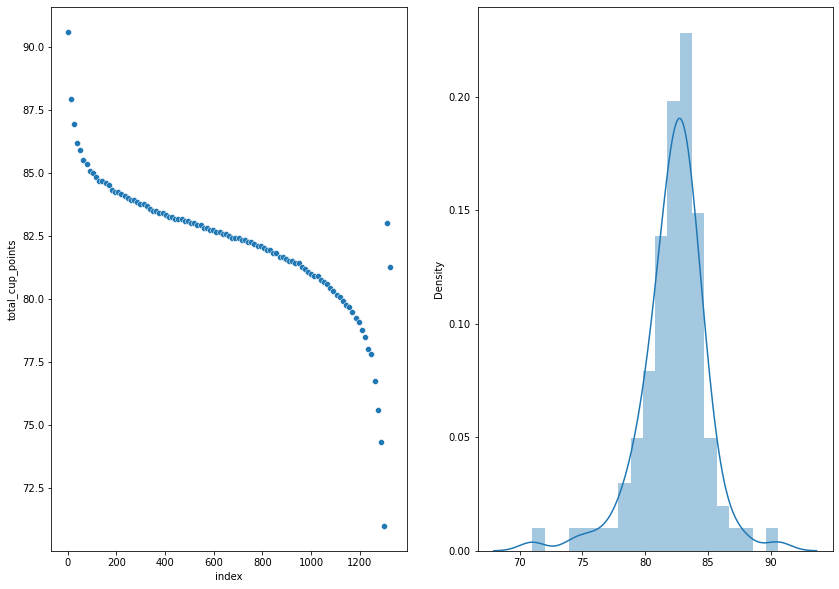

In [44]:
#systamatic sampling
#assuming intervel as 100
intervel =100
sel_rows=len(df2["total_cup_points"])//intervel
# to select all the row in the data set based on  the intervel
systamatic=df2['total_cup_points'].iloc[::sel_rows].reset_index()
#plotting the values
fig,ax=plt.subplots(1,2,figsize=(14,10))
sns.scatterplot(x='index',y='total_cup_points',data=systamatic,ax=ax[0])
sns.distplot(x=systamatic['total_cup_points'],ax=ax[1])

In [54]:
# checking the mean
sample_men=systamatic["total_cup_points"].mean()
popu_mean=df2['total_cup_points'].mean()
print("Population mean:",popu_mean,'sample_mean:',sample_men)

Population mean: 82.15120328849028 sample_mean: 82.26233009708739


# The scatterplot showing patten so we have to suffle the rows


---



5

In [50]:
#suffling the rows to get out of patten
sys2=df2["total_cup_points"].sample(frac=1)
sys2=sys2.reset_index(drop=True).reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


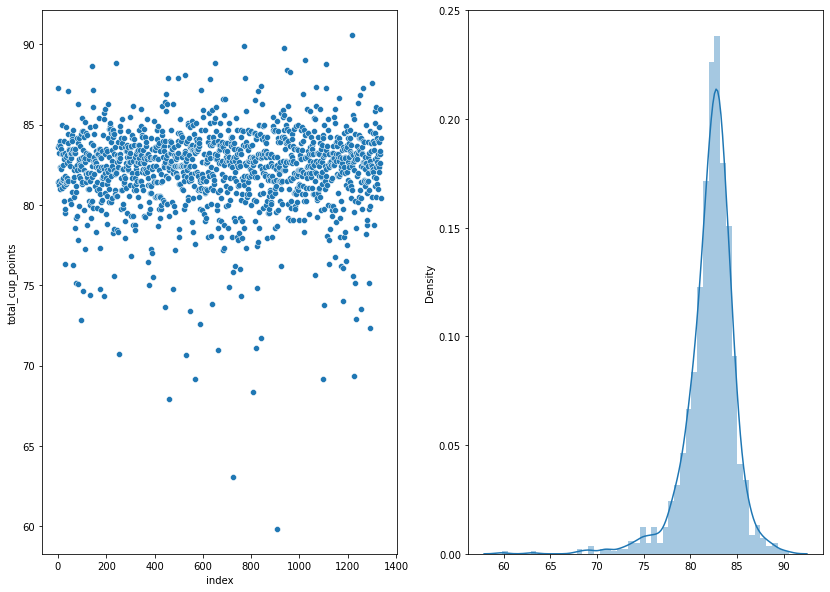

In [51]:
fig,ax=plt.subplots(1,2,figsize=(14,10))
sns.scatterplot(x='index',y='total_cup_points',data=sys2,ax=ax[0])
sns.distplot(x=sys2['total_cup_points'],ax=ax[1])

# we can see their is no patten in scatter plot because we suffed the rows which is equalent to the simple random sampling

In [52]:
# checking the mean
sample_men=sys2['total_cup_points'].mean()
popu_mean=df2['total_cup_points'].mean()
print("Population mean:",popu_mean,'sample_mean:',sample_men)

Population mean: 82.15120328849028 sample_mean: 82.15120328849028


# stratified sampling

In [67]:

#proportinal sampling
#equal count sampling
#weighted sampling

#select only three country
coffe_con=df2[df2["country_of_origin"].isin(['Colombia','Guatemala','Taiwan','Ethiopia'])]


In [77]:
#proportinal sampling
prop_sampling=coffe_con.groupby(["country_of_origin"])
prop_sampling=prop_sampling.sample(frac=0.4,random_state=12)

In [78]:
#comparing the proportion
popu_proportion=coffe_con["country_of_origin"].value_counts(normalize=True)
sample_prop=prop_sampling["country_of_origin"].value_counts(normalize=True)
print("population proportion :",'\n',popu_proportion)
print("Sample_proportion ;",'\n',sample_prop)
print("WE CAN SEE THE PROPORTION ARE MORE OR LESS EQUAL WITH POPULATION PROPORTION")

population proportion : 
 Colombia     0.378882
Guatemala    0.374741
Taiwan       0.155280
Ethiopia     0.091097
Name: country_of_origin, dtype: float64
Sample_proportion ; 
 Colombia     0.378238
Guatemala    0.373057
Taiwan       0.155440
Ethiopia     0.093264
Name: country_of_origin, dtype: float64
WE CAN SEE THE PROPORTION ARE MORE OR LESS EQUAL WITH POPULATION PROPORTION


In [80]:
#equal sampling
prop_sampling=coffe_con.groupby(["country_of_origin"])
# same process like proportion but we changed frac to count
prop_sampling=prop_sampling.sample(30,random_state=12)# here the frac is changes into 30 count

In [84]:
#comparing the proportion
popu_proportion=coffe_con["country_of_origin"].value_counts(normalize=True)
sample_prop=prop_sampling["country_of_origin"].value_counts(normalize=True)
print("population proportion :",'\n',popu_proportion)
print("Sample_proportion ;",'\n',sample_prop)
print("WE CAN SEE THE PROPORTION ARE identicaly EQUAL in sample propotion is 0.25")

population proportion : 
 Colombia     0.378882
Guatemala    0.374741
Taiwan       0.155280
Ethiopia     0.091097
Name: country_of_origin, dtype: float64
Sample_proportion ; 
 Colombia     0.25
Ethiopia     0.25
Guatemala    0.25
Taiwan       0.25
Name: country_of_origin, dtype: float64
WE CAN SEE THE PROPORTION ARE identicaly EQUAL in sample propotion is 0.25


In [88]:
#weighted sampling
#same process but using WEIGHTS parameter and we are not grouping here we just taking sample by specific weight


# in this coffee dataset we are WEIGTED by "category_two_defects"
prop_sampling=df2.sample(30,weights='category_two_defects') #just adding new attribute WEIGHTS


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


population mean 3.5575485799701045 sample mean 8.966666666666667


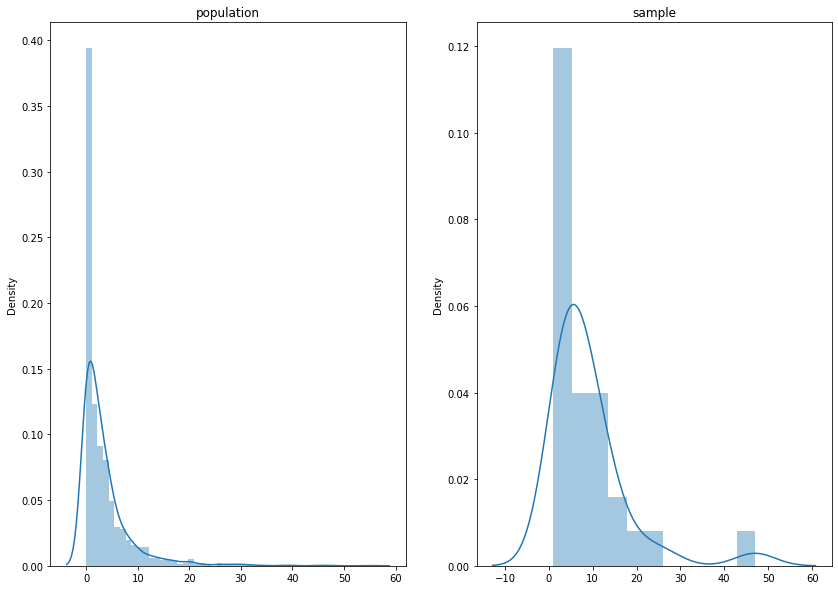

In [102]:
#comparing using histogram
fig,ax=plt.subplots(1,2,figsize=(14,10))
sns.distplot(x=df2["category_two_defects"],ax=ax[0]).set_title('population')
sns.distplot(x=prop_sampling["category_two_defects"],ax=ax[1]).set_title('sample')
print("population mean",df2["category_two_defects"].mean(),"sample mean",prop_sampling["category_two_defects"].mean())

In [172]:
#cluter sampling
#here we have to use categorical variable
import random

unique_samp=list(df["variety"].unique())
#randomly select the groups
np.random.seed(8)
unique_samp=random.sample(unique_samp,3)
#get the rows with havinhg the sample groups
clus_sample=df2[df2["variety"].isin(unique_samp)]
clus_sample["variety"]=clus_sample["variety"].cat.remove_unused_categories()
ran_clus_sample=clus_sample.groupby('variety')\
.sample(1,random_state=30)
pop=df2["variety"].value_counts(normalize=True)
sample=clus_sample["variety"].value_counts(normalize=True)
print(pop,sample)

Caturra                  0.229317
Bourbon                  0.203237
Typica                   0.189748
Other                    0.098921
Catuai                   0.066547
Hawaiian Kona            0.039568
Yellow Bourbon           0.031475
Mundo Novo               0.029676
Catimor                  0.017986
SL14                     0.015288
SL28                     0.013489
Pacas                    0.011691
Gesha                    0.010791
Pacamara                 0.007194
SL34                     0.007194
Arusha                   0.005396
Peaberry                 0.004496
Mandheling               0.002698
Sumatra                  0.002698
Blue Mountain            0.001799
Ethiopian Yirgacheffe    0.001799
Ruiru 11                 0.001799
Java                     0.001799
Ethiopian Heirlooms      0.000899
Moka Peaberry            0.000899
Marigojipe               0.000899
Sulawesi                 0.000899
Sumatra Lintong          0.000899
Pache Comun              0.000899
Name: variety,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [162]:
clus_sample["variety"].value_counts()

Hawaiian Kona    44
SL14             17
Pacas            13
Name: variety, dtype: int64